# Name: Nandish Bakulkumar Bhatt 
# Student ID: 200441204 

#### Acknowledgment: I would like to express my gratitude to Dr. Abdul Bais and Dr. Muhammad Hamza Asad for their continuous guidance and encouragement during this course. Without their support, this work would not been possible. The notes prepared by them is really comprehensive and has a deep learning.


## Importing Libraries

In [57]:
#Firstly importing all specific libraries needed in our program

import pandas as pd    #for data processing and extracting data from file
import matplotlib.pyplot as plt    #for plotting the functions
import numpy as np   #for array operations
import seaborn as sns   #for making statistical graphics 
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression

from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from numpy import log, dot, e
from numpy.random import rand
from sklearn.metrics import mean_squared_error, r2_score

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc

## Reading/Extracting the Data from dataset

In [58]:
#Loading the data from csv file

#Storing the data into dataframe
df=pd.read_csv("D:/MENG/Sem3/ENEL 865-ML/Assignment/Programming Assignment/PA3/archive/Fish.csv")

df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [59]:
#Printing the first 10 rows of dataset
print("The first 10 rows of the dataset is as follows:\n")
df.head(10)

The first 10 rows of the dataset is as follows:



,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [60]:
### Analysing the data

In [61]:
#Getting the shape of the data

print("The rows and column of this data are respectively: ")
df.shape


The rows and column of this data are respectively: 


(159, 7)

In [62]:
#Number of observations and Number of features

print("Thus,Total Number of observations and Number of features are respectively:")
df.shape

Thus,Total Number of observations and Number of features are respectively:


(159, 7)

In [63]:
#Now, know about the data type of each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [64]:
#Using this function count, mean, standard deviation, minimum value, 25%, 50%, 75%, and maximum values are obtained.

df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [65]:
#Now,checking that data has null value or not.
#First, checking that is there any missing values present in each column or not.
#If there is atleast one missing value in particular column, then it will give "True" otherwise if it doesn't then "False"

df.isna().any()


Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [66]:
#If any data has null value, then adding all these null data and looking upon the total number of missing data. 
 
print("Sum of Null Values in respective dataframes:")
df.isna().sum()

Sum of Null Values in respective dataframes:


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [67]:
#Normalizing each feature

#Function for Normalizing each dataset

def normalizing_dataset(X):
    
    X_list = list(X)
    Normalized_List = []
    max_value = max(X_list)
    min_value = min(X_list)
    
    loop_length = len(X_list)
    
    # Performing Min-Max Normalization
    for i in range(loop_length):
        
        normalized_value = (X_list[i] - min_value) / (max_value - min_value)
        Normalized_List.append(normalized_value)
    
    return Normalized_List


Weight = normalizing_dataset(df.Weight)
Length1 = normalizing_dataset(df.Length1)
Length2 = normalizing_dataset(df.Length2)
Length3 = normalizing_dataset(df.Length3)
Height = normalizing_dataset(df.Height)
Width = normalizing_dataset(df.Width)
Species = df.Species

df1={'Species':Species, 'Weight':tuple(Weight), 'Length1':tuple(Length1), 'Length2':tuple(Length2), 'Length3':tuple(Length3), 'Height':tuple(Height), 'Width':tuple(Width)} #storing into dictionary

#Normalized Dataset

df1 = pd.DataFrame(df1) #Normalized Dataframe
df1



,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,0.146667,0.304854,0.309091,0.358108,0.568334,0.418978
1,Bream,0.175758,0.320388,0.325455,0.378378,0.624055,0.459235
2,Bream,0.206061,0.318447,0.329091,0.376689,0.618123,0.514279
3,Bream,0.220000,0.365049,0.374545,0.417230,0.638566,0.480365
4,Bream,0.260606,0.368932,0.374545,0.425676,0.621966,0.576004
...,...,...,...,...,...,...,...
154,Smelt,0.007394,0.077670,0.069091,0.077703,0.021012,0.048771
155,Smelt,0.008121,0.081553,0.072727,0.079392,0.040723,0.031208
156,Smelt,0.007394,0.089320,0.083636,0.084459,0.031842,0.029347
157,Smelt,0.011939,0.110680,0.107273,0.108108,0.066424,0.143719


In [68]:
#Dividing the inputs and outputs
X = df1.drop(['Species'],axis=1).values
y = df1['Species'].values  


In [71]:
X

array([[1.46666667e-01, 3.04854369e-01, 3.09090909e-01, 3.58108108e-01,
        5.68334049e-01, 4.18978349e-01],
       [1.75757576e-01, 3.20388350e-01, 3.25454545e-01, 3.78378378e-01,
        6.24055350e-01, 4.59235453e-01],
       [2.06060606e-01, 3.18446602e-01, 3.29090909e-01, 3.76689189e-01,
        6.18123353e-01, 5.14278868e-01],
       [2.20000000e-01, 3.65048544e-01, 3.74545455e-01, 4.17229730e-01,
        6.38566105e-01, 4.80364795e-01],
       [2.60606061e-01, 3.68932039e-01, 3.74545455e-01, 4.25675676e-01,
        6.21965801e-01, 5.76003608e-01],
       [2.72727273e-01, 3.74757282e-01, 3.87272727e-01, 4.37500000e-01,
        6.89202837e-01, 5.46882048e-01],
       [3.03030303e-01, 3.74757282e-01, 3.87272727e-01, 4.34121622e-01,
        7.22699465e-01, 5.96371786e-01],
       [2.36363636e-01, 3.90291262e-01, 3.92727273e-01, 4.42567568e-01,
        6.35083524e-01, 5.13419035e-01],
       [2.72727273e-01, 3.90291262e-01, 3.92727273e-01, 4.44256757e-01,
        7.12565153e-01, 

In [72]:
y

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [73]:
#There are different functions made in the Logistic Regression Class.

class LogisticRegression(object):
    
    #function for initialization
    def __init__(Logreg, alpha=0.01, n_iteration=100):   
        Logreg.alpha = alpha                            
        Logreg.n_iter = n_iteration
        
    #function to find the sigmoid function
    def _sigmoid_function(Logreg, x): 
        value = 1 / (1 + np.exp(-x))
        return value
    
    #function is made to find the cost function
    def _cost_function(Logreg,h,theta, y): 
        m = len(y)
        cost = (1 / m) * (np.sum(-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))))
        return cost
    
    #function for finding gradient descent algorithm to find minimum value at which the function attains minimum value.
    def _gradient_descent(Logreg,X,h,theta,y,m): 
        gradient_value = np.dot(X.T, (h - y)) / m
        theta -= Logreg.alpha * gradient_value
        return theta
    
    #function for model to fit with the parameters
    def fit(Logreg, X, y): 
        print("Fitting with the given dataset values....")
        Logreg.theta = []
        Logreg.cost = []
        X = np.insert(X, 0, 1, axis=1)
        m = len(y)
        for i in np.unique(y): 
            #print('Descending the gradient for label type ' + str(i) + 'vs Rest')
            y_onevsall = np.where(y == i, 1, 0)
            theta = np.zeros(X.shape[1])
            cost = []
            for _ in range(Logreg.n_iter):
                z = X.dot(theta)
                h = Logreg._sigmoid_function(z)
                theta = Logreg._gradient_descent(X,h,theta,y_onevsall,m)
                cost.append(Logreg._cost_function(h,theta,y_onevsall)) 
            Logreg.theta.append((theta, i))
            Logreg.cost.append((cost,i))
        return Logreg 
    
    
    def predict(Logreg, X): # this function calls the max predict function to classify the individul feauter
        X = np.insert(X, 0, 1, axis=1)
        X_predicted = [max((Logreg._sigmoid_function(i.dot(theta)), c) for theta, c in Logreg.theta)[1] for i in X ]
        return X_predicted
    def score(Logreg,X, y): #This function compares the predictd label with the actual label to find the model performance
        score = sum(Logreg.predict(X) == y) / len(y)
        return score
    def _plot_cost(Logreg,costh): # This function plot the Cost function value
        for cost,c in costh:
                plt.plot(range(len(cost)),cost,'r')
                plt.title("Convergence Graph of Cost Function of type-" + str(c) +" vs All")
                plt.xlabel("Number of Iterations")
                plt.ylabel("Cost")
                plt.show()

Fitting the given dataset..


Training accuracy of the model is  0.7637795275590551
Testing accuracy of the model is  0.71875


Fitting the given dataset..


Training accuracy of the model is  0.7322834645669292
Testing accuracy of the model is  0.84375


Fitting the given dataset..


Training accuracy of the model is  0.7165354330708661
Testing accuracy of the model is  0.78125


Fitting the given dataset..


Training accuracy of the model is  0.7165354330708661
Testing accuracy of the model is  0.75


Fitting the given dataset..


Training accuracy of the model is  0.7322834645669292
Testing accuracy of the model is  0.75


Fitting the given dataset..


Training accuracy of the model is  0.7244094488188977
Testing accuracy of the model is  0.71875




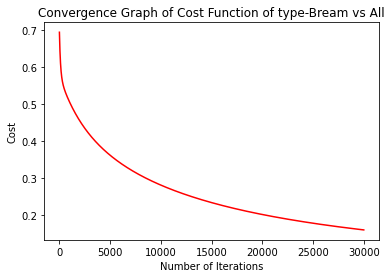

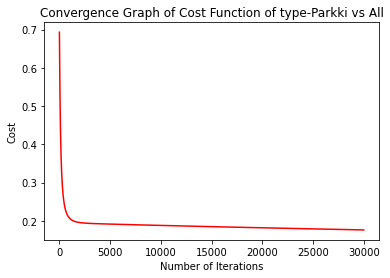

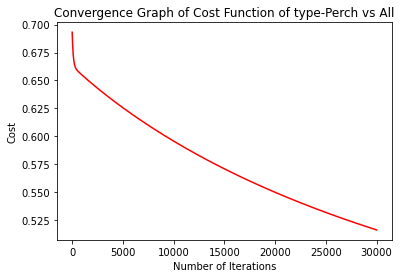

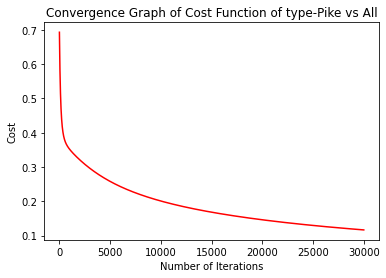

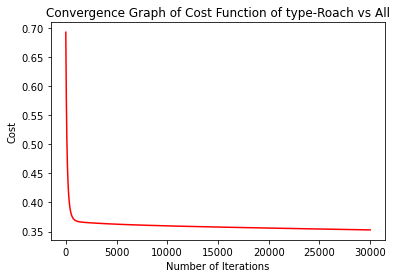

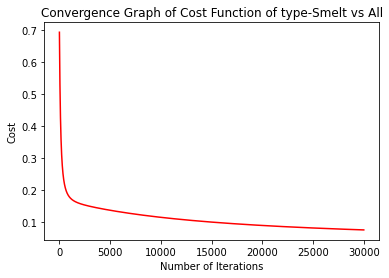

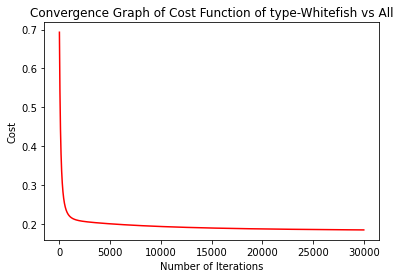

In [74]:
#Importing only Train-Test-Split function from Scikit module.
#Thus, we will obtain training values of x,y and Test Values of x,y.
#I have divided the data randomly into 80% training and rest 20% in testing. 


for _ in range (6):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)
    logi = LogisticRegression(n_iteration=30000).fit(x_train, y_train)
    predition1 = logi.predict(x_test)
    score_train = logi.score(x_train,y_train)
    score_test = logi.score(x_test,y_test)
    print("\n")
    print("Training accuracy of the model is ",score_train)
    print("Testing accuracy of the model is ",score_test)
    print("\n")

logi._plot_cost(logi.cost) # Here we ae plotting the Cost value and showing how it is depreciating close to 0 with each iteration

    

# 